In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import json
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
import numpy

import sklearn.ensemble
from sklearn.utils import class_weight, shuffle
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,classification_report,confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
from sklearn.pipeline import make_pipeline

#BERT random forest
import sys, setuptools, tokenize
import torch
#import tensorflow
#from tensorflow import keras
#import transformers as ppb
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import IntProgress

import math
import random
#import shap

from rdflib import Graph
import itertools

import pandas as pd
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

from nltk.corpus import stopwords
stop = stopwords.words('english')

from Text_representation import TF_IDF_for_Random_forest, BOW_matrix_for_Random_forest
import scispacy
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")


In [2]:
df_raw = pd.read_csv('opencitation_df_with_abstract.csv')
display(df_raw.head())
display(df_raw.describe(include='all', percentiles=[]))

,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,Volume,Year,Abstract_link,PMC,Abstract
0,[''],[''],0,10.1371/journal.pbio.0030199,6,https://journals.plos.org/plosbiology/article/...,e199,issn:1545-7885,Plos Biology,New Frameshifting Pseudoknot Found In Sars Virus,3,2005.0,http://ns.inria.fr/covid19/PMC1110910#abstract,PMC1110910,NaN
1,[''],['10.1128/jvi.01804-08'],1,10.1371/journal.pmed.0020274,8,https://journals.plos.org/plosmedicine/article...,e274,issn:1549-1676,Plos Medicine,A Novel Virus For Croup,2,2005.0,http://ns.inria.fr/covid19/PMC1188251#abstract,PMC1188251,NaN
2,[''],[''],0,10.1371/journal.pbio.0030353,10,https://journals.plos.org/plosbiology/article/...,e353,issn:1545-7885,Plos Biology,Casting A Wide Net To Fight Coronaviruses,3,2005.0,http://ns.inria.fr/covid19/PMC1197291#abstract,PMC1197291,NaN
3,"['Yang, Haitao', 'Xie, Weiqing', 'Xue, Xiaoyu'...","['10.1101/2020.02.26.964882', '10.1101/2020.03...",10,10.1371/journal.pbio.0030428,11,https://journals.plos.org/plosbiology/article/...,e428,issn:1545-7885,Plos Biology,Correction: Design Of Wide-Spectrum Inhibitors...,3,2005.0,http://ns.inria.fr/covid19/PMC1283410#abstract,PMC1283410,NaN
4,"['Kaplan, Warren A.']",[''],0,10.1038/sj.embor.7400320,1,https://europepmc.org/articles/pmc1299230?pdf=...,21-21,issn:1469-221X; issn:1469-3178,Embo Reports,Pushing And Pulling,6,2005.0,http://ns.inria.fr/covid19/PMC1299230#abstract,PMC1299230,NaN


,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,Volume,Year,Abstract_link,PMC,Abstract
count,16142,16142,16142.000000,16142,12616,15145,15273,14471,16101,16127,13888,16138.000000,16142,16142,5084
unique,10905,8042,NaN,16142,702,15142,9692,2810,3350,14820,567,NaN,16142,16142,4974
top,[''],[''],NaN,10.1007/s15011-020-3200-3,1,https://www.mja.com.au/system/files/issues/200...,3-3,issn:0140-6736,The Lancet,News In Brief,7,NaN,http://ns.inria.fr/covid19/PMC7320745#abstract,PMC7124615,Unknown
freq,3642,8064,NaN,1,1595,2,116,562,562,37,386,NaN,1,1,41
mean,NaN,NaN,14.210197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.948878,NaN,NaN,NaN
std,NaN,NaN,93.438528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.119648,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN
max,NaN,NaN,4885.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN


In [3]:
df_raw['Age']  = 2022- df_raw['Year']

In [4]:
df_raw["NormCitations"]= df_raw["Citation_count"]/df_raw['Age']

In [5]:
DISCRETIZATION_NUMBER_OF_CATEGORIES=2
DISCRETIZATION_PRECISION=0
DISCRETIZATION_LABELS=["low","high"]

In [6]:
#only print the boundaries
pd.qcut(df_raw["NormCitations"],q=DISCRETIZATION_NUMBER_OF_CATEGORIES, precision=0 ,duplicates='drop').value_counts()

(-0.1, 0.02]    8068
(0.02, inf]     8068
Name: NormCitations, dtype: int64

In [7]:
df_raw["Target"]=pd.qcut(df_raw["NormCitations"],
                            q=DISCRETIZATION_NUMBER_OF_CATEGORIES, 
                            precision=DISCRETIZATION_PRECISION, 
                            labels=DISCRETIZATION_LABELS)

In [8]:
df_raw["Target"].value_counts()

low     8068
high    8068
Name: Target, dtype: int64

In [9]:
#documents = documents.drop_duplicates(subset=['pubmed_id'], keep=False)
df_raw = df_raw.drop_duplicates(subset=['DOI','Journal_name'], keep=False)
#documents = documents.set_index("PMC")
df_raw = df_raw[df_raw["Title"].str.contains("NaN")==False]
df_raw['Title'] = df_raw['Title'].str.lower()
df_raw = df_raw[df_raw['Abstract'].notna()]
df_raw['Title_Abstract'] = df_raw['Title'] + df_raw['Abstract']
df_raw = df_raw[df_raw["Target"].str.contains("NaN")==False]

In [10]:
df_raw['stopwords_removed_title'] = df_raw['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_raw['stopwords_removed_abstract'] = df_raw['Abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_raw['stopwords_removed_title_abstract'] = df_raw['Title_Abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [11]:
df_raw['Scispacy_entity_0'] = np.nan
df_raw['Scispacy_entity_1'] = np.nan
df_raw['Scispacy_entity_2'] = np.nan
df_raw['Scispacy_entity_3'] = np.nan


row, col = df_raw.shape
for i in range(0,row,1):
    sample_transcription = df_raw['stopwords_removed_title'].iloc[i]
    #print(sample_transcription) # prints just the first 1000 characters
    doc = nlp(sample_transcription)
    #print("TEXT", "START", "END", "ENTITY TYPE")
    #index_count = 0
    try:
        #print(doc.ents[0])
        df_raw['Scispacy_entity_0'][i] = str(doc.ents[0])
    except:
        pass
    try:
        #print(doc.ents[1])
        df_raw['Scispacy_entity_1'][i] = str(doc.ents[1])
    except:
        pass
    try:
        #print(doc.ents[1])
        df_raw['Scispacy_entity_2'][i] = str(doc.ents[2])
    except:
        pass
    try:
        #print(doc.ents[1])
        df_raw['Scispacy_entity_3'][i] = str(doc.ents[3])
    except:
        pass

In [12]:
df_raw = df_raw.reset_index(drop=True)
df_raw

,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,...,NormCitations,Target,Title_Abstract,stopwords_removed_title,stopwords_removed_abstract,stopwords_removed_title_abstract,Scispacy_entity_0,Scispacy_entity_1,Scispacy_entity_2,Scispacy_entity_3
0,"['Breithaupt, Holger']","['10.1038/srep11376', '10.1128/jvi.79.4.2001-2...",6,10.1038/sj.embor.embor949,10,https://europepmc.org/articles/pmc1326407?pdf=...,921-924,issn:1469-221X; issn:1469-3178,Embo Reports,fierce creatures,...,0.315789,high,"fierce creaturesZoonoses, diseases that jump f...",fierce creatures,"Zoonoses, diseases jump animals humans, growin...","fierce creaturesZoonoses, diseases jump animal...",NaN,NaN,NaN,NaN
1,"['Eysenbach, Gunther']","['10.1080/13602380600571443', '10.1007/978-2-8...",52,10.2196/jmir.5.2.e14,2,https://doi.org/10.2196/jmir.5.2.e14,e14,issn:1438-8871,Journal Of Medical Internet Research,sars and population health technology,...,2.736842,high,sars and population health technologyThe recen...,sars population health technology,The recent global outbreak SARS (severe acute ...,sars population health technologyThe recent gl...,corticosteroids pain,sore,NaN,NaN
2,"['Kittler, Anne F', 'Hobbs, John', 'Volk, Lynn...","['10.1111/j.1539-6924.2011.01623.x', '10.1080/...",49,10.2196/jmir.6.1.e8,1,https://doi.org/10.2196/jmir.6.1.e8,e8,issn:1438-8871,Journal Of Medical Internet Research,the internet as a vehicle to communicate healt...,...,2.722222,high,the internet as a vehicle to communicate healt...,internet vehicle communicate health informatio...,BACKGROUND: The recent public health risks ari...,internet vehicle communicate health informatio...,NaN,NaN,NaN,NaN
3,"['Rizo, Carlos A', 'Lupea, Doina', 'Baybourdy,...","['10.1093/pubmed/fdp080', '10.1097/phh.0b013e3...",14,10.2196/jmir.7.4.e46,4,https://asset.jmir.pub/assets/71c7163a49d8cb92...,e46,issn:1438-8871,Journal Of Medical Internet Research,what internet services would patients like fro...,...,0.823529,high,what internet services would patients like fro...,internet services would patients like hospital...,BACKGROUND: International health organizations...,internet services would patients like hospital...,NaN,NaN,NaN,NaN
4,"['Gau, Vincent', 'Ma, Shu-Ching', 'Wang, Hua',...","['10.1039/b705672a', '10.1007/978-1-4020-8480-...",93,10.1016/j.ymeth.2005.05.008,1,https://doi.org/10.1016/j.ymeth.2005.05.008,73-83,issn:1046-2023,Methods,electrochemical molecular analysis without nuc...,...,5.470588,high,electrochemical molecular analysis without nuc...,electrochemical molecular analysis without nuc...,Electrochemical biosensors revolutionized gluc...,electrochemical molecular analysis without nuc...,anthrax-induced cell death,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,"['Martin-Loeches, Ignacio, 0000-0002-5834-4063...","['10.1172/jci150473', '10.3389/fmed.2021.67171...",8,10.1186/s13054-020-03219-4,1,https://ccforum.biomedcentral.com/track/pdf/10...,NaN,issn:1364-8535,Critical Care,the importance of airway and lung microbiome i...,...,4.000000,high,the importance of airway and lung microbiome i...,importance airway lung microbiome critically ill,"During critical illness, multitude forces anti...",importance airway lung microbiome critically i...,NaN,NaN,NaN,NaN
5075,"['Xie, Yewei', 'Wang, Zaisheng', 'Liao, Huipen...","['10.1002/adtp.202000172', '10.3389/fmed.2020....",53,10.1186/s12879-020-05371-2,1,https://bmcinfectdis.biomedcentral.com/track/p...,NaN,issn:1471-2334,Bmc Infectious Diseases,"epidemiologic, clinical, and laboratory findin...",...,26.500000,high,"epidemiologic, clinical, and laboratory findin...","epidemiologic, clinical, laboratory findings c...",BACKGROUND: The COVID-19 pandemic affected wor...,"epidemiologic, clinical, laboratory findings c...",NaN,NaN,NaN,NaN
5076,"['Shan, Benjie', 'Broza, Yoav Y., 0000-0003-01...","['10.3390/diagnostics12020430', '10.1016/j.ecl...",108,10.1021/acsnano.0c05657,

In [13]:
display(df_raw.describe(include='all', percentiles=[]))

,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,...,NormCitations,Target,Title_Abstract,stopwords_removed_title,stopwords_removed_abstract,stopwords_removed_title_abstract,Scispacy_entity_0,Scispacy_entity_1,Scispacy_entity_2,Scispacy_entity_3
count,5079,5079,5079.000000,5079,3946,4704,4683,4665,5038,5079,...,5079.000000,5079,5079,5079,5079,5079,863,208,34,11
unique,4298,3601,NaN,5079,234,4703,3851,1503,1686,4963,...,NaN,2,5055,4961,4968,5055,572,179,32,11
top,[''],[''],NaN,10.4103/2141-9248.117923,1,https://jamanetwork.com/journals/jamanetworkop...,8-8,issn:0262-4079,New Scientist,in case you haven't heard…,...,NaN,high,working from home? follow these tips for succe...,case heard…,Unknown,working home? follow tips successful remote wo...,covid-19,covid-19,covid-19,embellie
freq,420,1473,NaN,1,535,2,31,139,139,15,...,NaN,3605,5,15,41,5,64,12,3,1
mean,NaN,NaN,29.602284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,126.338403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,4162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_raw_without_entity_nan = df_raw[df_raw['Scispacy_entity_0'].notna()]

In [15]:
display(df_raw_without_entity_nan.describe(include='all', percentiles=[]))

,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,...,NormCitations,Target,Title_Abstract,stopwords_removed_title,stopwords_removed_abstract,stopwords_removed_title_abstract,Scispacy_entity_0,Scispacy_entity_1,Scispacy_entity_2,Scispacy_entity_3
count,863,863,863.000000,863,664,798,805,830,863,863,...,863.000000,863,863,863,863,863,863,208,34,11
unique,789,637,NaN,863,89,798,763,396,417,861,...,NaN,2,863,861,855,863,572,179,32,11
top,[''],[''],NaN,10.4103/2141-9248.117923,2,http://www.cell.com/article/S0960982204000661/pdf,280A-280A,issn:0028-0836; issn:1476-4687,Nature,gastroenterologie,...,NaN,high,data and preprintsJournal requirements for dat...,biologische waffen – eine herausforderung diag...,Unknown,"206A novel betacoronavirus, Middle East respir...",covid-19,covid-19,covid-19,diabetes mellitus
freq,49,227,NaN,1,126,1,5,51,52,2,...,NaN,636,1,2,9,1,64,12,3,1
mean,NaN,NaN,49.811124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.898437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,232.250126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.600501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,4162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Enhance the dataset

In [19]:
from kgextension.linking_sklearn import pattern_linker, label_linker,dbpedia_lookup_linker,dbpedia_spotlight_linker
from kgextension.endpoints import WikiData

df_label_linked = label_linker(
    df_raw_without_entity_nan, column='Scispacy_entity_0', new_attribute_name="new_link", 
    result_filter=None, language="en", max_hits=1,
    label_property="rdfs:label"
)

  0%|          | 0/863 [00:00<?, ?it/s]

In [21]:
df_label_linked.head(2)

,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,...,stopwords_removed_title,stopwords_removed_abstract,stopwords_removed_title_abstract,Scispacy_entity_0,Scispacy_entity_1,Scispacy_entity_2,Scispacy_entity_3,new_link_1,new_link_2,new_link_3
0,"['Eysenbach, Gunther']","['10.1080/13602380600571443', '10.1007/978-2-8...",52,10.2196/jmir.5.2.e14,2,https://doi.org/10.2196/jmir.5.2.e14,e14,issn:1438-8871,Journal Of Medical Internet Research,sars and population health technology,...,sars population health technology,The recent global outbreak SARS (severe acute ...,sars population health technologyThe recent gl...,corticosteroids pain,sore,NaN,NaN,NaN,NaN,NaN
1,"['Gau, Vincent', 'Ma, Shu-Ching', 'Wang, Hua',...","['10.1039/b705672a', '10.1007/978-1-4020-8480-...",93,10.1016/j.ymeth.2005.05.008,1,https://doi.org/10.1016/j.ymeth.2005.05.008,73-83,issn:1046-2023,Methods,electrochemical molecular analysis without nuc...,...,electrochemical molecular analysis without nuc...,Electrochemical biosensors revolutionized gluc...,electrochemical molecular analysis without nuc...,anthrax-induced cell death,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
display(df_label_linked.describe(include='all', percentiles=[]))

,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,...,stopwords_removed_title,stopwords_removed_abstract,stopwords_removed_title_abstract,Scispacy_entity_0,Scispacy_entity_1,Scispacy_entity_2,Scispacy_entity_3,new_link_1,new_link_2,new_link_3
count,863,863,863.000000,863,664,798,805,830,863,863,...,863,863,863,863,208,34,11,16,7,3
unique,789,637,NaN,863,89,798,763,396,417,861,...,861,855,863,572,179,32,11,12,3,1
top,[''],[''],NaN,10.4103/2141-9248.117923,2,http://www.cell.com/article/S0960982204000661/pdf,280A-280A,issn:0028-0836; issn:1476-4687,Nature,biologische waffen – eine herausforderung an d...,...,biologische waffen – eine herausforderung diag...,Unknown,"206A novel betacoronavirus, Middle East respir...",covid-19,covid-19,covid-19,diabetes mellitus,http://dbpedia.org/property/death,http://dbpedia.org/property/death,http://dbpedia.org/property/death
freq,49,227,NaN,1,126,1,5,51,52,2,...,2,9,1,64,12,3,1,3,3,3
mean,NaN,NaN,49.811124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,232.250126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,4162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# from sklearn.pipeline import Pipeline 
# pipeline = Pipeline(steps = [('lookup_linker', linker),
#                              ('generator', generator)])

# df_enhanced = pipeline.fit_transform(df_raw.drop(columns='Target'))

In [35]:
# from kgextension.generator_sklearn import SpecificRelationGenerator
# from kgextension.linking_sklearn import DbpediaLookupLinker
# from sklearn.pipeline import Pipeline 

# linker = DbpediaLookupLinker(column='new_link')
# generator = SpecificRelationGenerator(columns=['new_link'], direct_relation='http://purl.org/dc/terms/subject')
# pipeline = Pipeline(steps = [('lookup_linker', linker),('generator', generator)])

# df_enhanced = pipeline.fit_transform(df_pattern_linked.drop(columns='Target'))

In [28]:
# from kgextension.linking_sklearn import DbpediaLookupLinker
# from kgextension.generator_sklearn import SpecificRelationGenerator
# from sklearn.pipeline import Pipeline 

# linker = DbpediaLookupLinker(column='new_link_1')
# generator = SpecificRelationGenerator(columns=['new_link_1'], direct_relation='http://purl.org/dc/terms/subject')
# pipeline = Pipeline(steps = [('lookup_linker', linker),
#                              ('generator', generator)])

# df_enhanced = pipeline.fit_transform(df_label_linked.drop(columns='Target'))

In [80]:
# from kgextension.generator import direct_type_generator

# df_direct_type = direct_type_generator(df_enhanced, "new_link_1")
# df_direct_type1 = direct_type_generator(df_enhanced, "new_link_2")
# df_direct_type2 = direct_type_generator(df_enhanced, "new_link_3")

# from kgextension.generator import unqualified_relation_generator

# df_direct_type = unqualified_relation_generator(df_enhanced, "new_link_1")
# df_direct_type1 = unqualified_relation_generator(df_enhanced, "new_link_2")
# df_direct_type2 = unqualified_relation_generator(df_enhanced, "new_link_3")


from kgextension.generator import qualified_relation_generator

df_direct_type = qualified_relation_generator(df_enhanced, "new_link_1")
df_direct_type1 = qualified_relation_generator(df_enhanced, "new_link_2")
df_direct_type2 = qualified_relation_generator(df_enhanced, "new_link_3")


Column:   0%|          | 0/1 [00:00<?, ?it/s]

Column:   0%|          | 0/1 [00:00<?, ?it/s]

Column:   0%|          | 0/1 [00:00<?, ?it/s]

In [89]:
# df_direct_type3.head(2)

In [90]:
display(df_direct_type.describe(include='all', percentiles=[]))

,Author_name,Citation,Citation_count,DOI,Issue,oa_link,Page,Source_id,Journal_name,Title,...,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/class/yago/Symbol106806469,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/class/yago/WikicatTypographicalSymbols,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/ontology/ChemicalSubstance,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/ontology/Drug,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/ontology/Place,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://umbel.org/umbel/rc/ChemicalSubstanceType,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#ChemicalObject,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://www.w3.org/2002/07/owl#Thing,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://www.wikidata.org/entity/Q8386,Link_Out_boolean_http://xmlns.com/foaf/0.1/isPrimaryTopicOf_type_http://xmlns.com/foaf/0.1/Document
count,863,863,863.000000,863,664,798,805,830,863,863,...,863,863,863,863,863,863,863,863,863,863
unique,789,637,NaN,863,89,798,763,396,417,861,...,2,2,2,2,2,2,2,2,2,2
top,[''],[''],NaN,10.4103/2141-9248.117923,2,http://www.cell.com/article/S0960982204000661/pdf,280A-280A,issn:0028-0836; issn:1476-4687,Nature,gastroenterologie,...,False,False,False,False,False,False,False,False,False,False
freq,49,227,NaN,1,126,1,5,51,52,2,...,862,862,862,862,862,862,862,861,862,860
mean,NaN,NaN,49.811124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,232.250126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,4162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# display(df_direct_type1.describe(include='all', percentiles=[]))

In [92]:
# display(df_direct_type2.describe(include='all', percentiles=[]))

In [93]:
X=df_direct_type.drop(columns=['Author_name', 'Citation', 'Citation_count', 'DOI', 'Issue', 'oa_link',
       'Page', 'Source_id', 'Journal_name', 'new_link', 'Volume', 'Title','Year', 'Abstract_link', 'PMC','Abstract','Age','NormCitations','Title_Abstract','Scispacy_entity_0','Scispacy_entity_1','Scispacy_entity_2','Scispacy_entity_3','stopwords_removed_title','stopwords_removed_abstract','stopwords_removed_title_abstract','new_link_1','new_link_2','new_link_3'])
# X1=df_direct_type1.drop(columns=['Author_name', 'Citation', 'Citation_count', 'DOI', 'Issue', 'oa_link',
#        'Page', 'Source_id', 'Journal_name', 'new_link', 'Volume', 'Title','Year', 'Abstract_link', 'PMC','Abstract','Age','NormCitations','Title_Abstract','Scispacy_entity_0','Scispacy_entity_1','Scispacy_entity_2','Scispacy_entity_3','stopwords_removed_title','stopwords_removed_abstract','stopwords_removed_title_abstract','new_link_1','new_link_2','new_link_3'])
# X2=df_direct_type2.drop(columns=['Author_name', 'Citation', 'Citation_count', 'DOI', 'Issue', 'oa_link',
#        'Page', 'Source_id', 'Journal_name', 'new_link', 'Volume', 'Title','Year', 'Abstract_link', 'PMC','Abstract','Age','NormCitations','Title_Abstract','Scispacy_entity_0','Scispacy_entity_1','Scispacy_entity_2','Scispacy_entity_3','stopwords_removed_title','stopwords_removed_abstract','stopwords_removed_title_abstract','new_link_1','new_link_2','new_link_3'])


In [94]:
# merge_df_1 = X.merge(X1, how='inner', left_index=True, right_index=True)
# merge_df_2 = merge_df_1.merge(X2, how='inner', left_index=True, right_index=True)

In [95]:
# merge_df_2

In [96]:
matrix_bow_pd, matrix_bow, vect_bow  = BOW_matrix_for_Random_forest.bow_matrix_for_random_forest(df_raw,'stopwords_removed_title')


In [97]:
matrix_bow_pd

,19,19 pandemic,19 patients,2019,2019 covid,2019 covid 19,2020,activity,acute,acute respiratory,...,treatment,trial,use,using,vaccine,viral,virus,virus infection,viruses,vitro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5075,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5076,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5077,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
merge_df_3 = X#merge_df_2.fillna(False)

In [102]:
merge_df_3 = merge_df_3*1

In [103]:
merge_df_3

,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/Attribute100024264,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/Communication100033020,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/Condition113920835,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/Disease114070360,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/IllHealth114052046,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/Illness114061805,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/PathologicalState114051917,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/PhysicalCondition114034177,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/Signal106791372,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageRedirects_type_http://dbpedia.org/class/yago/State100024720,...,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/class/yago/Symbol106806469,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/class/yago/WikicatTypographicalSymbols,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/ontology/ChemicalSubstance,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/ontology/Drug,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/ontology/Place,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://umbel.org/umbel/rc/ChemicalSubstanceType,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#ChemicalObject,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://www.w3.org/2002/07/owl#Thing,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://www.wikidata.org/entity/Q8386,Link_Out_boolean_http://xmlns.com/foaf/0.1/isPrimaryTopicOf_type_http://xmlns.com/foaf/0.1/Document
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,1,0,1,1,1,1,1,1,0,1,...,0,0,1,1,0,1,1,1,1,1


In [104]:
merge_df_with_BOW = matrix_bow_pd.merge(merge_df_3, how='inner', left_index=True, right_index=True)
merge_df_with_BOW

,19,19 pandemic,19 patients,2019,2019 covid,2019 covid 19,2020,activity,acute,acute respiratory,...,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/class/yago/Symbol106806469,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/class/yago/WikicatTypographicalSymbols,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/ontology/ChemicalSubstance,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/ontology/Drug,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://dbpedia.org/ontology/Place,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://umbel.org/umbel/rc/ChemicalSubstanceType,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#ChemicalObject,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://www.w3.org/2002/07/owl#Thing,Link_Out_boolean_http://dbpedia.org/ontology/wikiPageWikiLink_type_http://www.wikidata.org/entity/Q8386,Link_Out_boolean_http://xmlns.com/foaf/0.1/isPrimaryTopicOf_type_http://xmlns.com/foaf/0.1/Document
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1


In [105]:
from sklearn import preprocessing
label_binarizer = preprocessing.LabelBinarizer()
y = label_binarizer.fit_transform(df_raw_without_entity_nan['Target']).ravel()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(merge_df_with_BOW, y, test_size=0.30, stratify=y, random_state=1)

clf = RandomForestClassifier(bootstrap= True, max_depth= 1000, max_features= 10, min_samples_leaf= 1, min_samples_split= 100, n_estimators= 500)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=1000, max_features=10, min_samples_split=100,
                       n_estimators=500)

              precision    recall  f1-score   support

        high       0.75      0.98      0.85       191
         low       0.67      0.09      0.16        68

    accuracy                           0.75       259
   macro avg       0.71      0.54      0.50       259
weighted avg       0.73      0.75      0.67       259



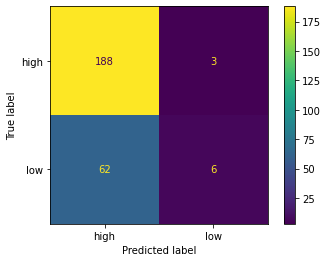

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_binarizer.classes_))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_binarizer.classes_).plot()
plt.show()

In [108]:
pd.set_option('display.max_colwidth', None) # for full width column

ind = np.argsort(clf.feature_importances_)[-15:]
pd.DataFrame({
    'features': merge_df_with_BOW.columns[ind], 
    'importance': clf.feature_importances_[ind]
}).sort_values('importance', ascending=False)

,features,importance
14,pneumonia,0.025364
13,using,0.024655
12,based,0.021883
11,treatment,0.021542
10,application,0.019392
9,viral,0.017844
8,model,0.017591
7,case,0.017002
6,public health,0.015293
5,mortality,0.014619
